<a href="https://colab.research.google.com/github/carolina-garay/AnalisisYCuracion_Grupo32/blob/carolina_Garay_AyC/AEyC_parte1_Garay_vfinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2022*

----

# Trabajo práctico entregable - parte 1
Garay Carolina

En esta notebook, vamos a cargar el conjunto de datos de [la compentencia Kaggle](https://www.kaggle.com/dansbecker/melbourne-housing-snapshot) sobre estimación de precios de ventas de propiedades en Melbourne, Australia.

Utilizaremos el conjunto de datos reducido producido por [DanB](https://www.kaggle.com/dansbecker). Hemos subido una copia a un servidor de la Universidad Nacional de Córdoba para facilitar su acceso remoto.

In [1]:
# Setup
#!pip install pandas_profiling==2.8.0
!pip install pandas==1.2.0


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.9 MB 4.8 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5


In [2]:
!pip install python-decouple

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import io
import matplotlib.pyplot as plt
import gdown

import seaborn as sns
sns.set_context('talk')

from decouple import config
from sqlalchemy import create_engine, text

import plotly
plotly.__version__
# Make sure it's 4.14.3

'5.5.0'

## Ejercicio 1 SQL: 

1. Crear una base de datos en SQLite utilizando la libreria [SQLalchemy](https://stackoverflow.com/questions/2268050/execute-sql-from-file-in-sqlalchemy).
https://docs.sqlalchemy.org/en/14/core/engines.html#sqlite

2. Ingestar los datos provistos en 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv' en una tabla y el dataset generado en clase con datos de airbnb y sus precios por codigo postal en otra.

3. Implementar consultas en SQL que respondan con la siguiente información:

    - cantidad de registros totales por ciudad.
    - cantidad de registros totales por barrio y ciudad.

4. Combinar los datasets de ambas tablas ingestadas utilizando el comando JOIN de SQL  para obtener un resultado similar a lo realizado con Pandas en clase.  



##EJERCICIO1_Respuestas

1.1 Crear una base de datos en SQLite utilizando la libreria [SQLalchemy](https://stackoverflow.com/questions/2268050/execute-sql-from-file-in-sqlalchemy).
https://docs.sqlalchemy.org/en/14/core/engines.html#sqlite


In [4]:
#Luego de realizar una rápida exploración de los datos
#establecemos conexión a la base de dstos
#Aquí el módulo sqlite3 proporciona una interfaz sencilla para interactuar con bases de datos SQLite.
engine = create_engine('sqlite:///sysarmy.sqlite3', echo=True)

1.2 Ingestar los datos provistos en 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv' en una tabla y el dataset generado en clase con datos de airbnb y sus precios por codigo postal en otra.


In [5]:
import numpy as np
import pandas as pd

In [6]:
melb_df = pd.read_csv('https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv')

In [7]:
melb_df.to_sql('melb_sql', con=engine, if_exists="replace")

2022-05-30 13:56:40,231 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("melb_sql")
2022-05-30 13:56:40,233 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-05-30 13:56:40,237 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("melb_sql")
2022-05-30 13:56:40,240 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-05-30 13:56:40,249 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2022-05-30 13:56:40,254 INFO sqlalchemy.engine.Engine 
CREATE TABLE melb_sql (
	"index" BIGINT, 
	"Suburb" TEXT, 
	"Address" TEXT, 
	"Rooms" BIGINT, 
	"Type" TEXT, 
	"Price" FLOAT, 
	"Method" TEXT, 
	"SellerG" TEXT, 
	"Date" TEXT, 
	"Distance" FLOAT, 
	"Postcode" FLOAT, 
	"Bedroom2" FLOAT, 
	"Bathroom" FLOAT, 
	"Car" FLOAT, 
	"Landsize" FLOAT, 
	"BuildingArea" FLOAT, 
	"YearBuilt" FLOAT, 
	"CouncilArea" TEXT, 
	"Lattitude" FLOAT, 
	"Longtitude" FLOAT, 
	"Regionname" TEXT, 
	"Propertycount" FLOAT
)


2022-05-30 13:56:40,259 INFO sqlalchemy.engine.Engine [no key 0.00478s] ()
2022-05-30 13:56:40,277 INFO sqlalche

In [8]:
#Lectura del dataset airbnb
#Descargamos el archivo generado en clase desde drive de Carolina 
!gdown https://drive.google.com/file/d/1sUR2Odse85vmQn62yYaEsaUCRJo28Nj2/view?usp=sharing --fuzzy

airbnb_df = pd.read_csv('/content/airbnb_price_by_zipcode.csv')


Downloading...
From: https://drive.google.com/uc?id=1sUR2Odse85vmQn62yYaEsaUCRJo28Nj2
To: /content/airbnb_price_by_zipcode.csv
100% 10.1k/10.1k [00:00<00:00, 8.87MB/s]


In [9]:
airbnb_df.to_sql('airbnb_sql', con=engine, if_exists="replace")

2022-05-30 13:56:42,241 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("airbnb_sql")
2022-05-30 13:56:42,246 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-05-30 13:56:42,250 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("airbnb_sql")
2022-05-30 13:56:42,253 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-05-30 13:56:42,258 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2022-05-30 13:56:42,266 INFO sqlalchemy.engine.Engine 
CREATE TABLE airbnb_sql (
	"index" BIGINT, 
	zipcode FLOAT, 
	airbnb_price_mean FLOAT, 
	airbnb_record_count BIGINT, 
	airbnb_weekly_price_mean FLOAT, 
	airbnb_monthly_price_mean FLOAT
)


2022-05-30 13:56:42,272 INFO sqlalchemy.engine.Engine [no key 0.00617s] ()
2022-05-30 13:56:42,291 INFO sqlalchemy.engine.Engine CREATE INDEX ix_airbnb_sql_index ON airbnb_sql ("index")
2022-05-30 13:56:42,293 INFO sqlalchemy.engine.Engine [no key 0.00192s] ()
2022-05-30 13:56:42,310 INFO sqlalchemy.engine.Engine COMMIT
2022-05-30 13:56:42,314 INFO sqlalchemy.engine.

In [10]:
#Visualización de columnas de los dataframe airbnb_df y melb_df
print("Columnas de airbnb_df:",airbnb_df.columns)
print("Columnas de melb_df:",melb_df.columns)


Columnas de airbnb_df: Index(['zipcode', 'airbnb_price_mean', 'airbnb_record_count',
       'airbnb_weekly_price_mean', 'airbnb_monthly_price_mean'],
      dtype='object')
Columnas de melb_df: Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')


In [11]:
 #Recuento de filas de los dataframe
 print(len(airbnb_df))
 print(len(melb_df))

247
13580


3. Implementar consultas en SQL que respondan con la siguiente información:

    - cantidad de registros totales por ciudad.
    - cantidad de registros totales por barrio y ciudad.

In [12]:

# Cantidad de registros totales por ciudad en el dataframe melb_df
query1 = "SELECT CouncilArea, COUNT(CouncilArea) FROM melb_sql GROUP BY CouncilArea"

# Cantidad de registros totales por barrio y ciudad en el dataframe melb_df
query2 = "SELECT CouncilArea, Suburb, COUNT(Suburb) FROM melb_sql GROUP BY Suburb ORDER BY CouncilArea"



In [13]:
#Lista con las consultas 
queries = [query1, query2]


In [14]:
with engine.connect() as con:
    for query in queries:
      rs = con.execute(query)
      print(query)
      for row in rs:
          print(row)

      print('\n\n')

2022-05-30 13:56:42,473 INFO sqlalchemy.engine.Engine SELECT CouncilArea, COUNT(CouncilArea) FROM melb_sql GROUP BY CouncilArea
2022-05-30 13:56:42,475 INFO sqlalchemy.engine.Engine [raw sql] ()
SELECT CouncilArea, COUNT(CouncilArea) FROM melb_sql GROUP BY CouncilArea
(None, 0)
('Banyule', 594)
('Bayside', 489)
('Boroondara', 1160)
('Brimbank', 424)
('Cardinia', 8)
('Casey', 38)
('Darebin', 934)
('Frankston', 53)
('Glen Eira', 848)
('Greater Dandenong', 52)
('Hobsons Bay', 434)
('Hume', 164)
('Kingston', 207)
('Knox', 80)
('Macedon Ranges', 7)
('Manningham', 311)
('Maribyrnong', 692)
('Maroondah', 80)
('Melbourne', 470)
('Melton', 66)
('Monash', 333)
('Moonee Valley', 997)
('Moorabool', 1)
('Moreland', 1163)
('Nillumbik', 36)
('Port Phillip', 628)
('Stonnington', 719)
('Unavailable', 1)
('Whitehorse', 304)
('Whittlesea', 167)
('Wyndham', 86)
('Yarra', 647)
('Yarra Ranges', 18)



2022-05-30 13:56:42,528 INFO sqlalchemy.engine.Engine SELECT CouncilArea, Suburb, COUNT(Suburb) FROM melb_s

1.4 Combinar los datasets de ambas tablas ingestadas utilizando el comando JOIN de SQL  para obtener un resultado similar a lo realizado con Pandas en clase.  



In [15]:
airbn_melb_df= engine.connect().execute('SELECT * FROM  melb_sql LEFT JOIN airbnb_sql ON melb_sql.Postcode = airbnb_sql.zipcode')

2022-05-30 13:56:42,622 INFO sqlalchemy.engine.Engine SELECT * FROM  melb_sql LEFT JOIN airbnb_sql ON melb_sql.Postcode = airbnb_sql.zipcode
2022-05-30 13:56:42,625 INFO sqlalchemy.engine.Engine [raw sql] ()


## Ejercicio 2: 

1. Seleccionar un subconjunto de columnas que les parezcan relevantes al problema de predicción del valor de la propiedad. Justificar las columnas seleccionadas y las que no lo fueron.
 - Eliminar los valores extremos que no sean relevantes para la predicción de valores de las propiedades.

2. Agregar información adicional respectiva al entorno de una propiedad a partir del [conjunto de datos de AirBnB](https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv) utilizado en el práctico. 
  1. Seleccionar qué variables agregar y qué combinaciones aplicar a cada una. Por ejemplo, pueden utilizar solo la columna `price`, o aplicar múltiples transformaciones como la mediana o el mínimo.
  1. Utilizar la variable zipcode para unir los conjuntos de datos. Sólo incluir los zipcodes que tengan una cantidad mínima de registros (a elección) como para que la información agregada sea relevante.
  2. Investigar al menos otras 2 variables que puedan servir para combinar los datos, y justificar si serían adecuadas o no. Pueden asumir que cuentan con la ayuda de anotadores expertos para encontrar equivalencias entre barrios o direcciones, o que cuentan con algoritmos para encontrar las n ubicaciones más cercanas a una propiedad a partir de sus coordenadas geográficas. **NO** es necesario que realicen la implementación.

Pueden leer otras columnas del conjunto de AirBnB además de las que están en `interesting_cols`, si les parecen relevantes.

##EJERCICIO2_Respuestas

1. Seleccionar un subconjunto de columnas que les parezcan relevantes al problema de predicción del valor de la propiedad. Justificar las columnas seleccionadas y las que no lo fueron.
 - Eliminar los valores extremos que no sean relevantes para la predicción de valores de las propiedades.

In [16]:
#from pandas_profiling import ProfileReport

In [17]:
#profile = ProfileReport(melb_df)
#profile

Basados en el reporte de pandas_profiling seleccionamos las siguientes variables para estudiar el problema de predicción del valor de la propiedad.
*  YearBuilt
*  BuildingArea
*  Car
*  Price
*  Postcode
*  Suburb
*  Rooms



In [18]:
melb_new= melb_df[['Regionname', 'Suburb', 'Type', 'YearBuilt','BuildingArea' ,'Car','Price' ,'Postcode','Rooms']]
	
melb_new.head()

,Regionname,Suburb,Type,YearBuilt,BuildingArea,Car,Price,Postcode,Rooms
0,Northern Metropolitan,Abbotsford,h,NaN,NaN,1.0,1480000.0,3067.0,2
1,Northern Metropolitan,Abbotsford,h,1900.0,79.0,0.0,1035000.0,3067.0,2
2,Northern Metropolitan,Abbotsford,h,1900.0,150.0,0.0,1465000.0,3067.0,3
3,Northern Metropolitan,Abbotsford,h,NaN,NaN,1.0,850000.0,3067.0,3
4,Northern Metropolitan,Abbotsford,h,2014.0,142.0,2.0,1600000.0,3067.0,4


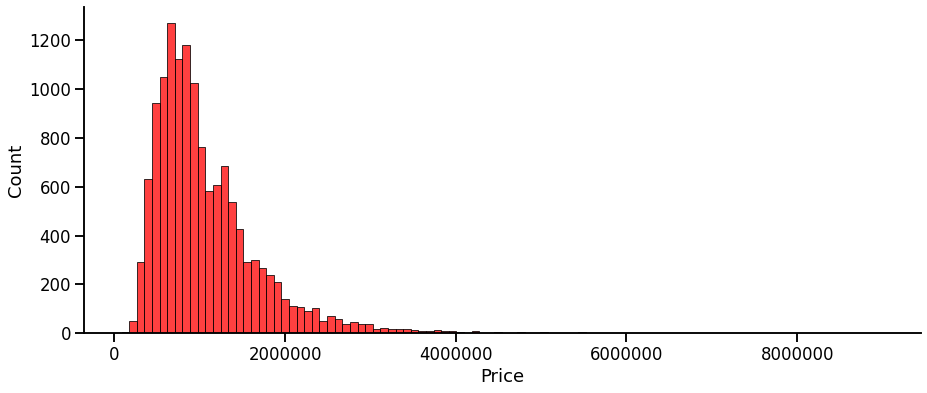

In [19]:
#Histograma de la base de datos melb_new
plt.figure(figsize=(15,6))
sns.histplot(melb_new.Price.dropna(), bins=100, color ='red')
plt.ticklabel_format(style='plain')
sns.despine()

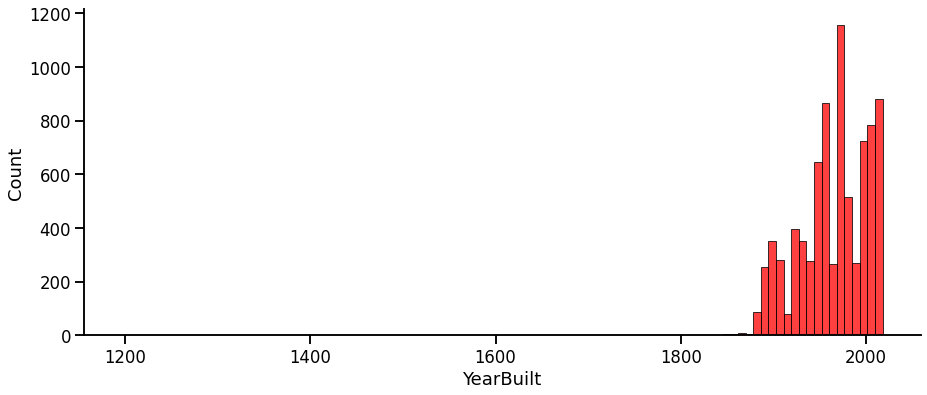

In [20]:
#Histograma de la base de datos melb_new
plt.figure(figsize=(15,6))
sns.histplot(melb_new.YearBuilt, bins=100, color ='red')
plt.ticklabel_format(style='plain')
sns.despine()

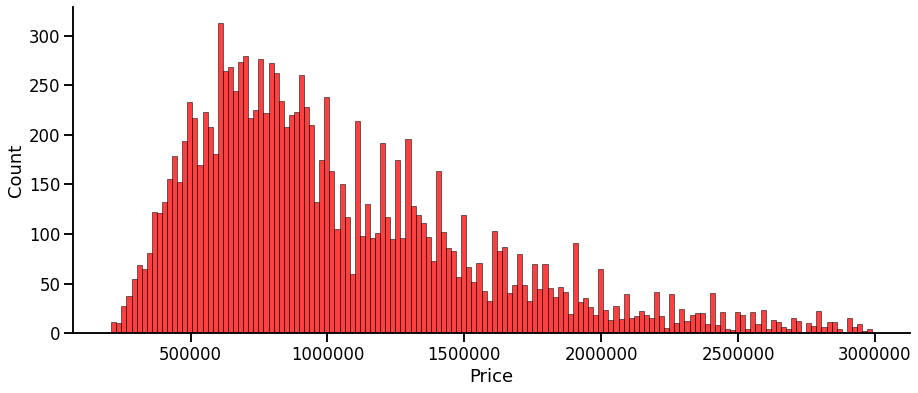

In [21]:
# Filtrado de la base de datos por precios 

melb_newp =  melb_new[(melb_new['Price'] > 200000) & (melb_new['Price'] < 3000000)]
plt.figure(figsize=(15,6))
sns.histplot(melb_newp['Price'].dropna(), bins=150, color ='red')
plt.ticklabel_format(style='plain')
sns.despine()

In [24]:
#Filtrado de la base de datos por valores extremos Car
melb_newcc =  melb_newp [melb_newp ['Car'] < 7]

#Filtrado de la base de datos por valores extremos YearBuilt
melb_newy  =  melb_newcc[melb_newcc['YearBuilt'] > 1989]

In [45]:
melb_a = melb_newcc[(melb_newcc['BuildingArea'] !=44515) & (melb_newcc['BuildingArea'] !=0)]

In [46]:
melb_a['BuildingArea'].min()

1.0

In [48]:
melb_a['BuildingArea'].max()

6791.0

In [57]:
melb_a1 = melb_a[(melb_a['BuildingArea'] !=6791) & (melb_a['BuildingArea'] !=1)]
melb_a1

,Regionname,Suburb,Type,YearBuilt,BuildingArea,Car,Price,Postcode,Rooms
0,Northern Metropolitan,Abbotsford,h,NaN,NaN,1.0,1480000.0,3067.0,2
1,Northern Metropolitan,Abbotsford,h,1900.0,79.0,0.0,1035000.0,3067.0,2
2,Northern Metropolitan,Abbotsford,h,1900.0,150.0,0.0,1465000.0,3067.0,3
3,Northern Metropolitan,Abbotsford,h,NaN,NaN,1.0,850000.0,3067.0,3
4,Northern Metropolitan,Abbotsford,h,2014.0,142.0,2.0,1600000.0,3067.0,4
...,...,...,...,...,...,...,...,...,...
13575,South-Eastern Metropolitan,Wheelers Hill,h,1981.0,NaN,2.0,1245000.0,3150.0,4
13576,Western Metropolitan,Williamstown,h,1995.0,133.0,2.0,1031000.0,3016.0,3
13577,Western Metropolitan,Williamstown,h,1997.0,NaN,4.0,1170000.0,3016.0,3
13578,Western Metropolitan,Williamstown,h,1920.0,157.0,5.0,2500000.0,3016.0,4


In [66]:
melb_a2 = melb_a1[(melb_a1['BuildingArea'] !=3558) & (melb_a1['BuildingArea'] !=2)]

In [89]:
melb_a6['BuildingArea'].max()

1022.0

In [90]:
melb_a6['BuildingArea'].min()

9.0

In [91]:
melb_a7 = melb_a6[(melb_a6['BuildingArea'] !=1022) & (melb_a6['BuildingArea'] !=9)]

In [82]:
melb_a4['BuildingArea'].value_counts(1)

120.00    0.016444
110.00    0.012806
100.00    0.012515
130.00    0.012078
115.00    0.011059
            ...   
105.90    0.000146
547.00    0.000146
169.50    0.000146
178.74    0.000146
118.54    0.000146
Name: BuildingArea, Length: 569, dtype: float64

In [96]:
melb_a7[(melb_a7['BuildingArea'] <1000)& (melb_a7['BuildingArea'] >800)]

,Regionname,Suburb,Type,YearBuilt,BuildingArea,Car,Price,Postcode,Rooms
7172,Southern Metropolitan,Ormond,h,1925.0,808.0,1.0,1920000.0,3204.0,4
12064,Northern Metropolitan,Lalor,h,1980.0,934.0,1.0,580500.0,3075.0,3


In [100]:
melb_a8 = melb_a7[(melb_a7['BuildingArea'] !=808)& (melb_a7['BuildingArea'] !=934)&(melb_a7['BuildingArea'] !=792)& (melb_a7['BuildingArea'] !=789)]


In [102]:
melb_a8[(melb_a8['BuildingArea'] >700)]

,Regionname,Suburb,Type,YearBuilt,BuildingArea,Car,Price,Postcode,Rooms
647,Southern Metropolitan,Balwyn North,h,1950.0,720.0,2.0,1903000.0,3104.0,3
770,Southern Metropolitan,Bentleigh,h,NaN,766.0,2.0,1150000.0,3204.0,4
1489,Eastern Metropolitan,Bulleen,h,1965.0,719.0,1.0,1050000.0,3105.0,3
9794,Southern Metropolitan,Bentleigh East,h,NaN,736.0,3.0,1410000.0,3165.0,3
11707,Southern Metropolitan,Highett,h,1998.0,719.0,2.0,1535000.0,3190.0,4


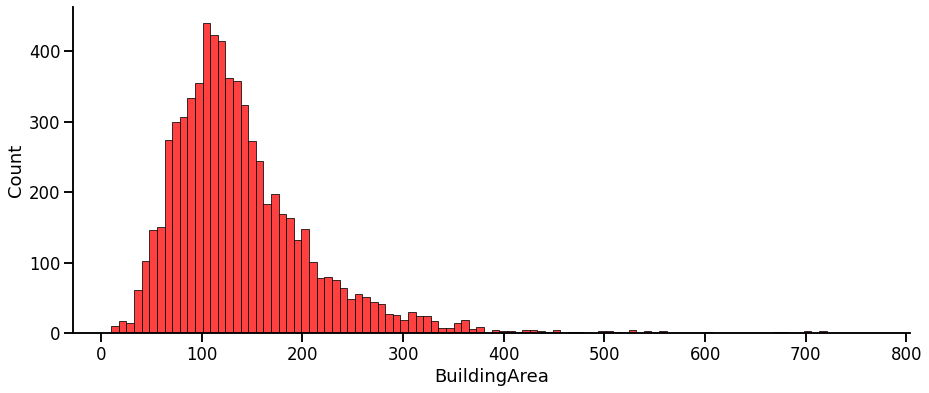

In [101]:
#Histograma de la base de datos melb_new
plt.figure(figsize=(15,6))
sns.histplot(melb_a8.BuildingArea, bins=100, color ='red')
plt.ticklabel_format(style='plain')
sns.despine()

In [26]:
melb_x= melb_newcc[melb_newcc['YearBuilt']<1855]
melb_x

,Regionname,Suburb,Type,YearBuilt,BuildingArea,Car,Price,Postcode,Rooms
2079,Northern Metropolitan,Collingwood,u,1830.0,122.0,1.0,855000.0,3066.0,2
2554,Northern Metropolitan,Fitzroy,h,1850.0,NaN,0.0,677000.0,3065.0,2
4843,Southern Metropolitan,Prahran,u,1850.0,101.0,1.0,841000.0,3181.0,2
5405,Northern Metropolitan,Richmond,h,1850.0,144.0,2.0,1600000.0,3121.0,3
5860,Southern Metropolitan,St Kilda,u,1850.0,3.0,2.0,1600000.0,3182.0,3
9968,Eastern Metropolitan,Mount Waverley,h,1196.0,117.0,4.0,1200000.0,3149.0,3


In [27]:
melb_x= melb_newcc[melb_newcc['YearBuilt']<1880]
melb_x

,Regionname,Suburb,Type,YearBuilt,BuildingArea,Car,Price,Postcode,Rooms
2079,Northern Metropolitan,Collingwood,u,1830.0,122.00,1.0,855000.0,3066.0,2
2554,Northern Metropolitan,Fitzroy,h,1850.0,NaN,0.0,677000.0,3065.0,2
4408,Northern Metropolitan,Northcote,h,1870.0,NaN,2.0,1950000.0,3070.0,4
4580,Northern Metropolitan,Parkville,h,1875.0,172.00,1.0,2200000.0,3052.0,2
4707,Southern Metropolitan,Port Melbourne,h,1863.0,280.00,0.0,2200000.0,3207.0,3
4843,Southern Metropolitan,Prahran,u,1850.0,101.00,1.0,841000.0,3181.0,2
5405,Northern Metropolitan,Richmond,h,1850.0,144.00,2.0,1600000.0,3121.0,3
5536,Southern Metropolitan,South Melbourne,h,1856.0,232.00,0.0,2260000.0,3205.0,4
5543,Southern Metropolitan,South Melbourne,h,1860.0,153.00,1.0,2180000.0,3205.0,4
5568,Southern Metropolitan,South Melbourne,h,1877.0,260.00,2.0,2300000.0,3205.0,3


In [28]:
melb_x.isnull().sum(axis = 0)

Regionname      0
Suburb          0
Type            0
YearBuilt       0
BuildingArea    6
Car             0
Price           0
Postcode        0
Rooms           0
dtype: int64

In [29]:
#melb_newc = melb_newcc[(melb_newcc['YearBuilt']!=1196) & (melb_newcc['YearBuilt']!=1830) & (melb_newcc['YearBuilt']!=1850) ]

In [103]:
melb_newc = melb_a8[(melb_a8['YearBuilt']!=1196)]

In [104]:
melb_newc

,Regionname,Suburb,Type,YearBuilt,BuildingArea,Car,Price,Postcode,Rooms
0,Northern Metropolitan,Abbotsford,h,NaN,NaN,1.0,1480000.0,3067.0,2
1,Northern Metropolitan,Abbotsford,h,1900.0,79.0,0.0,1035000.0,3067.0,2
2,Northern Metropolitan,Abbotsford,h,1900.0,150.0,0.0,1465000.0,3067.0,3
3,Northern Metropolitan,Abbotsford,h,NaN,NaN,1.0,850000.0,3067.0,3
4,Northern Metropolitan,Abbotsford,h,2014.0,142.0,2.0,1600000.0,3067.0,4
...,...,...,...,...,...,...,...,...,...
13575,South-Eastern Metropolitan,Wheelers Hill,h,1981.0,NaN,2.0,1245000.0,3150.0,4
13576,Western Metropolitan,Williamstown,h,1995.0,133.0,2.0,1031000.0,3016.0,3
13577,Western Metropolitan,Williamstown,h,1997.0,NaN,4.0,1170000.0,3016.0,3
13578,Western Metropolitan,Williamstown,h,1920.0,157.0,5.0,2500000.0,3016.0,4


In [105]:
melb_newc.isnull().sum(axis = 0)

Regionname         0
Suburb             0
Type               0
YearBuilt       5227
BuildingArea    6313
Car                0
Price              0
Postcode           0
Rooms              0
dtype: int64

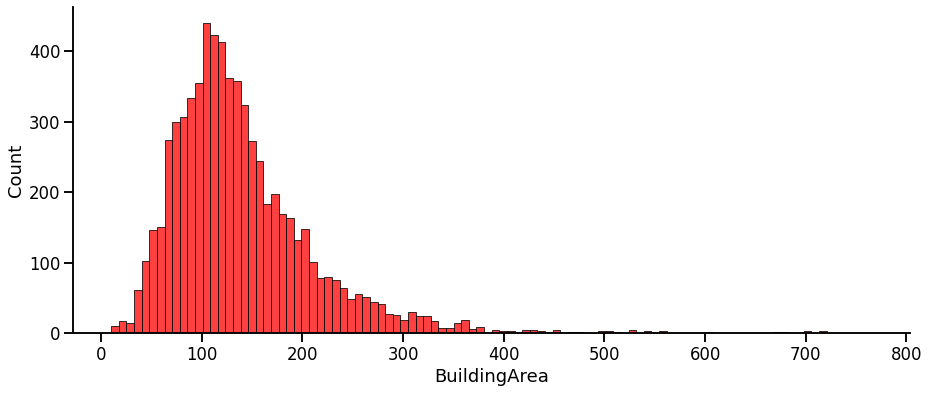

In [106]:
#Histograma de la base de datos melb_new
plt.figure(figsize=(15,6))
sns.histplot(melb_newc.BuildingArea, bins=100, color ='red')
plt.ticklabel_format(style='plain')
sns.despine()

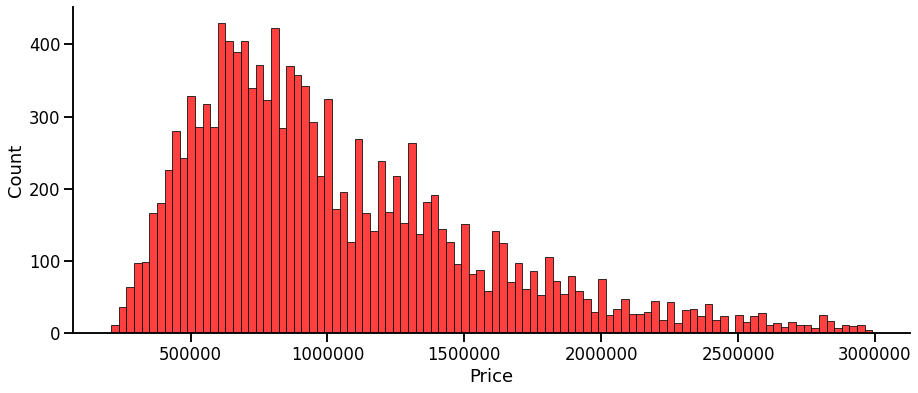

In [109]:
plt.figure(figsize=(15,6))
sns.histplot(melb_newc.Price, bins=100, color ='red')
plt.ticklabel_format(style='plain')
sns.despine()


2. Agregar información adicional respectiva al entorno de una propiedad a partir del [conjunto de datos de AirBnB](https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv) utilizado en el práctico. 
  1. Seleccionar qué variables agregar y qué combinaciones aplicar a cada una. Por ejemplo, pueden utilizar solo la columna `price`, o aplicar múltiples transformaciones como la mediana o el mínimo.

In [110]:
# Seleccionamos las variables a agregar
interesting_features = ['zipcode','price', 'weekly_price', 'monthly_price']
AirB = pd.read_csv('https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/cleansed_listings_dec18.csv', usecols=interesting_features)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [111]:
# Filtramos las columnas correspondientes a las variables seleccionadas y luego realizamos la agregación agrupando por zipcode.
# La operación conlleva pasar como argumento el nombre de la nueva columna y como valor una tupla donde el primer valor es el nombre de la
# columna original y el segundo valor es la operación de agregación que nos interesa.
AirB_agg = AirB[interesting_features].groupby('zipcode').agg(AirB_record_count=('price', 'count'),
        AirB_daily_price_mean=('price', 'mean'),
        AirB_weekly_price_mean=('weekly_price', 'mean'),
        AirB_monthly_price_mean=('monthly_price', 'mean'))\
        .reset_index()

In [112]:
AirB_agg.head()

,zipcode,AirB_record_count,AirB_daily_price_mean,AirB_weekly_price_mean,AirB_monthly_price_mean
0,2010.0,1,40.00000,NaN,NaN
1,2134.0,1,50.00000,NaN,NaN
2,2582.0,1,104.00000,NaN,NaN
3,3000.0,2491,149.23605,804.0,3469.0
4,3001.0,1,120.00000,NaN,NaN


1. Utilizar la variable zipcode para unir los conjuntos de datos. Sólo incluir los zipcodes que tengan una cantidad mínima de registros (a elección) como para que la información agregada sea relevante.

In [113]:
# Seleccionamos los zipcodes que tienen al menos 3 registros en un compromiso entre contar con suficientes datos sin perder demasiados zipcodes 
AirB_aggClean = AirB_agg[AirB_agg['AirB_record_count']>2]
print(len(AirB_agg))
print(len(AirB_aggClean))

463
396


In [114]:
# Convertimos zipcode de object a float64 para que coincidan los dtypes al realizar el merge
AirB_aggClean['zipcode'] = AirB_aggClean['zipcode'].astype(float, errors = 'raise')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [115]:
# Unimos los datasets
Merge_df = melb_newc.merge(AirB_aggClean, how='left', left_on='Postcode', right_on='zipcode')
Merge_df

,Regionname,Suburb,Type,YearBuilt,BuildingArea,Car,Price,Postcode,Rooms,zipcode,AirB_record_count,AirB_daily_price_mean,AirB_weekly_price_mean,AirB_monthly_price_mean
0,Northern Metropolitan,Abbotsford,h,NaN,NaN,1.0,1480000.0,3067.0,2,3067.0,157.0,140.292994,236.250000,956.363636
1,Northern Metropolitan,Abbotsford,h,NaN,NaN,1.0,1480000.0,3067.0,2,3067.0,101.0,115.594059,735.352941,2863.900000
2,Northern Metropolitan,Abbotsford,h,1900.0,79.0,0.0,1035000.0,3067.0,2,3067.0,157.0,140.292994,236.250000,956.363636
3,Northern Metropolitan,Abbotsford,h,1900.0,79.0,0.0,1035000.0,3067.0,2,3067.0,101.0,115.594059,735.352941,2863.900000
4,Northern Metropolitan,Abbotsford,h,1900.0,150.0,0.0,1465000.0,3067.0,3,3067.0,157.0,140.292994,236.250000,956.363636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25570,Western Metropolitan,Williamstown,h,1997.0,NaN,4.0,1170000.0,3016.0,3,3016.0,20.0,167.200000,633.000000,2163.000000
25571,Western Metropolitan,Williamstown,h,1920.0,157.0,5.0,2500000.0,3016.0,4,3016.0,54.0,199.944444,550.000000,1990.000000
25572,Western Metropolitan,Williamstown,h,1920.0,157.0,5.0,2500000.0,3016.0,4,3016.0,20.0,167.200000,633.000000,2163.000000
25573,Western Metropolitan,Yarraville,h,1920.0,112.0,1.0,1285000.0,3013.0,4,3013.0,42.0,127.523810,NaN,NaN


## Ejercicio 3:

Crear y guardar un nuevo conjunto de datos con todas las transformaciones realizadas anteriormente.

In [116]:
from google.colab import files

Merge_df.to_csv('Merge_df.csv', index=None)
files.download('Merge_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Ejercicios opcionales:

1. Armar un script en python (archivo .py) [ETL](https://towardsdatascience.com/what-to-log-from-python-etl-pipelines-9e0cfe29950e) que corra los pasos de extraccion, transformacion y carga, armando una funcion para cada etapa del proceso y luego un main que corra todos los pasos requeridos.

2. Armar un DAG en Apache Airflow que corra el ETL. (https://airflow.apache.org/docs/apache-airflow/stable/tutorial.html)